In [134]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [7]:
# load bayes_df 
DATA_DIR = '/Users/Colin/Google_Drive/ML_DSGA_1003/asylum_project/'
bayes_df = pd.read_csv(os.path.join(DATA_DIR, 'bayes_df.csv'), index_col=0)
bayes_df.head()

,nat_IN,nat_HO,nat_CH,nat_EO,nat_PE,nat_LE,nat_RU,nat_LA,nat_RO,nat_KZ,...,lang_MAS,lang_TZO,lang_BHU,lang_MHL,lang_HER,lang_MNW,lang_KIG,lang_JAM,lawyer_1,lawyer_0
0,0.751773,0.434783,0.851852,0.500000,0.466667,0.428571,0.902655,0.200000,0.619048,0.727273,...,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.860592,0.789474
1,0.219697,0.152174,0.712838,0.454545,0.281250,0.529412,0.826667,0.200000,0.230769,0.666667,...,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.577708,0.096296
2,0.510638,0.088889,0.408333,0.466667,0.204082,0.272727,0.677419,0.333333,0.333333,0.821429,...,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.203685,0.114078
3,0.201835,0.060000,0.324921,0.307692,0.366667,0.230769,0.328767,0.150000,0.354839,0.650000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.296473,0.050193
4,0.709677,0.295775,0.753165,0.454545,0.595238,0.500000,0.868421,0.307692,0.625000,0.600000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.597374,0.238411


In [8]:
# load dunn data
master_dunn = pd.read_csv(os.path.join(DATA_DIR,'raw/_decision_scheduling_merge_final_converted.csv'), 
                          encoding='latin-1', low_memory=False) # gets UnicodeDecodeError otherwise 
master_dunn.head()

,Unnamed: 0,idncase,idnproceeding,nat,case_type,c_asy_type,base_city_code,hearing_loc_code,dec_type,dec_code,...,adj_osc_year,adj_osc_month,adj_osc_day,adj_osc_date,eoirattyid,alienattyid,langid,hearingid,basecityid,last_hearing_on_comp_date
0,0,3327379,488,IN,DEP,E,NYC,NYC,W,V,...,NaN,NaN,NaN,NaN,44811.0,16732.0,380.0,210.0,36,0
1,1,3327267,886,IN,DEP,E,NEW,NEW,W,D,...,NaN,NaN,NaN,NaN,46939.0,17939.0,380.0,195.0,34,0
2,2,3327149,1079,HO,DEP,E,MIA,MIA,W,V,...,NaN,NaN,NaN,NaN,63318.0,10166.0,430.0,181.0,33,0
3,3,3326718,1495,IN,RMV,I,SEA,SEA,W,V,...,NaN,NaN,NaN,NaN,91952.0,2531.0,380.0,269.0,48,0
4,4,3326894,1631,IN,DEP,I,LVG,REN,W,R,...,NaN,NaN,NaN,NaN,46090.0,5952.0,119.0,253.0,31,0


In [10]:
# judge list is index
judge_list = master_dunn['ij_code'].unique()
bayes_df.index = judge_list
bayes_df.head()

,nat_IN,nat_HO,nat_CH,nat_EO,nat_PE,nat_LE,nat_RU,nat_LA,nat_RO,nat_KZ,...,lang_MAS,lang_TZO,lang_BHU,lang_MHL,lang_HER,lang_MNW,lang_KIG,lang_JAM,lawyer_1,lawyer_0
TAB,0.751773,0.434783,0.851852,0.500000,0.466667,0.428571,0.902655,0.200000,0.619048,0.727273,...,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.860592,0.789474
AJR,0.219697,0.152174,0.712838,0.454545,0.281250,0.529412,0.826667,0.200000,0.230769,0.666667,...,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.577708,0.096296
CJS,0.510638,0.088889,0.408333,0.466667,0.204082,0.272727,0.677419,0.333333,0.333333,0.821429,...,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.203685,0.114078
HO,0.201835,0.060000,0.324921,0.307692,0.366667,0.230769,0.328767,0.150000,0.354839,0.650000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.296473,0.050193
IW,0.709677,0.295775,0.753165,0.454545,0.595238,0.500000,0.868421,0.307692,0.625000,0.600000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.597374,0.238411


In [69]:
# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=39, n_init = 100).fit(bayes_df)
kmeans.labels_

array([2, 1, 4, 4, 1, 4, 1, 0, 1, 0, 1, 3, 3, 0, 4, 4, 2, 4, 4, 0, 3, 2, 0,
       0, 3, 3, 1, 0, 0, 0, 1, 1, 3, 0, 3, 0, 0, 3, 3, 0, 1, 1, 2, 2, 1, 0,
       3, 0, 3, 4, 0, 3, 3, 0, 4, 3, 1, 3, 3, 4, 2, 3, 3, 3, 2, 0, 1, 3, 3,
       3, 0, 1, 2, 4, 0, 2, 3, 1, 3, 3, 3, 3, 3, 2, 4, 1, 1, 0, 0, 3, 1, 3,
       0, 4, 4, 0, 3, 0, 0, 3, 1, 1, 1, 0, 1, 4, 1, 4, 3, 1, 3, 1, 4, 4, 3,
       1, 1, 3, 3, 4, 0, 3, 3, 3, 3, 3, 3, 1, 3, 2, 1, 0, 4, 4, 0, 4, 3, 3,
       1, 4, 1, 1, 4, 0, 4, 3, 3, 3, 4, 4, 3, 0, 3, 3, 4, 4, 0, 0, 4, 3, 4,
       0, 4, 4, 4, 4, 4, 1, 4, 0, 3, 4, 0, 3, 0, 3, 0, 1, 4, 4, 3, 0, 1, 0,
       1, 4, 4, 4, 3, 0, 3, 4, 4, 0, 0, 4, 4, 4, 0, 3, 4, 4, 0, 3, 3, 0, 1,
       3, 4, 4, 4, 4, 4, 4, 0, 1, 4, 4, 4, 0, 4, 0, 0, 3, 1, 4, 3, 3, 3, 4,
       4, 4, 3, 3, 3, 4, 4, 3, 4, 3, 1, 3, 3, 3, 1, 3, 4, 4, 1, 0, 0, 4, 1,
       1, 4, 4, 3, 4, 3, 4, 0, 3, 0, 3, 0, 1, 1, 3, 3, 4, 3, 3, 1, 3, 4, 3,
       0, 4, 3, 1, 3, 1, 1, 4, 4, 0, 4, 3, 4, 3, 0, 3, 4, 1, 3, 3, 1, 0, 3,
       1, 1,

In [ ]:
# PCA for plotting
pca = PCA(n_components=2)
pca.fit(bayes_df)
reduced = pca.transform(bayes_df)
reduced.shape


In [80]:
plot_df = pd.DataFrame({'pc_1':reduced[:,0], 'pc_2': reduced[:,1], 'cluster':kmeans.labels_})
plot_df.head()

,cluster,pc_1,pc_2
0,2,3.529059,-0.790814
1,1,1.206113,-0.010879
2,4,-0.411662,-0.212893
3,4,-0.548775,0.132329
4,1,1.446594,0.086536


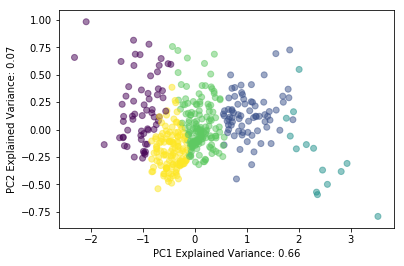

In [95]:

plt.scatter(plot_df['pc_1'], plot_df['pc_2'], alpha = 0.5, c=plot_df['cluster'])
plt.xlabel('PC1 Explained Variance: ' + str(round(pca.explained_variance_[0], 2)))
plt.ylabel('PC2 Explained Variance: ' + str(round(pca.explained_variance_[1], 2)))
#plt.legend()

In [44]:
print(pca.components_[0].shape)
print(kmeans.labels_.shape)

(642,)
(426,)


In [100]:
silhouette_avg = silhouette_score(plot_df, kmeans.labels_)
sample_silhouette_values = silhouette_samples(plot_df, kmeans.labels_)

For n_clusters = 2 The average silhouette_score is : 0.290787929511
For n_clusters = 3 The average silhouette_score is : 0.121709996152
For n_clusters = 4 The average silhouette_score is : 0.11873550209
For n_clusters = 5 The average silhouette_score is : 0.0738419780863
For n_clusters = 6 The average silhouette_score is : 0.0542086968291
For n_clusters = 10 The average silhouette_score is : 0.0400778915948
For n_clusters = 12 The average silhouette_score is : 0.0297740640931
For n_clusters = 20 The average silhouette_score is : 0.0264363238537


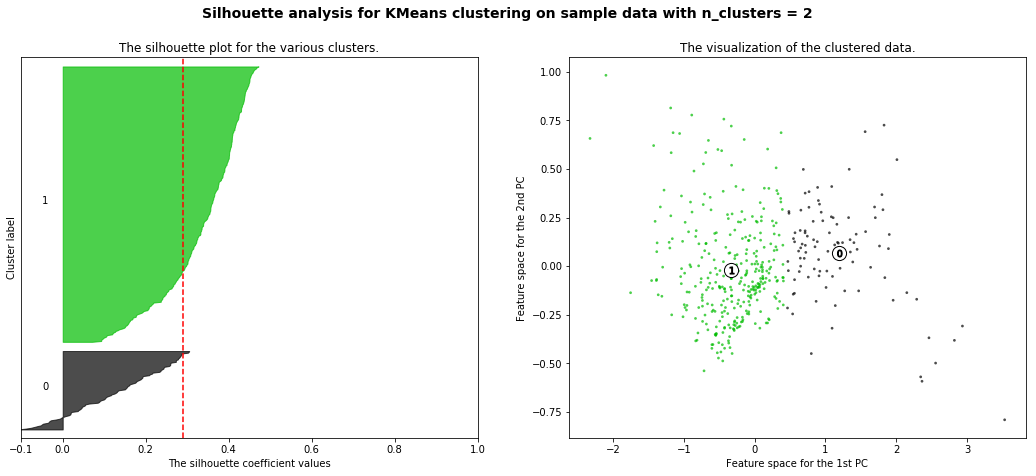

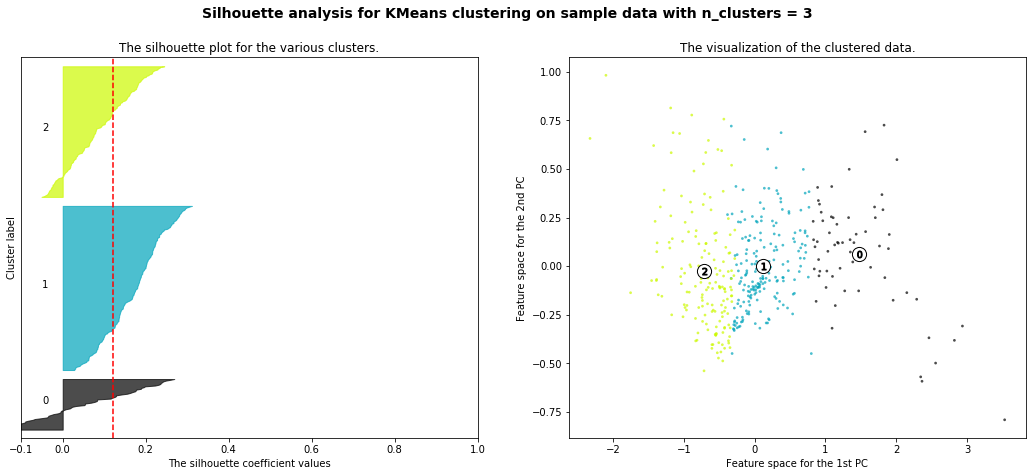

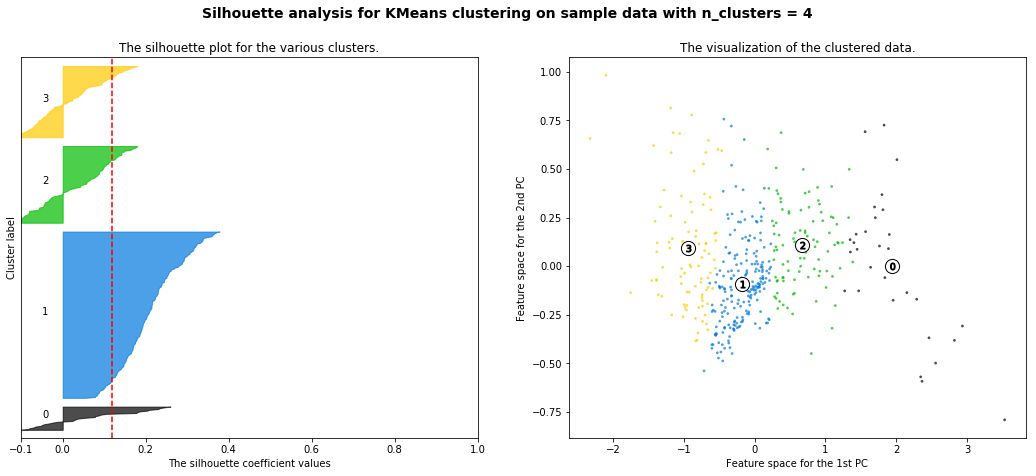

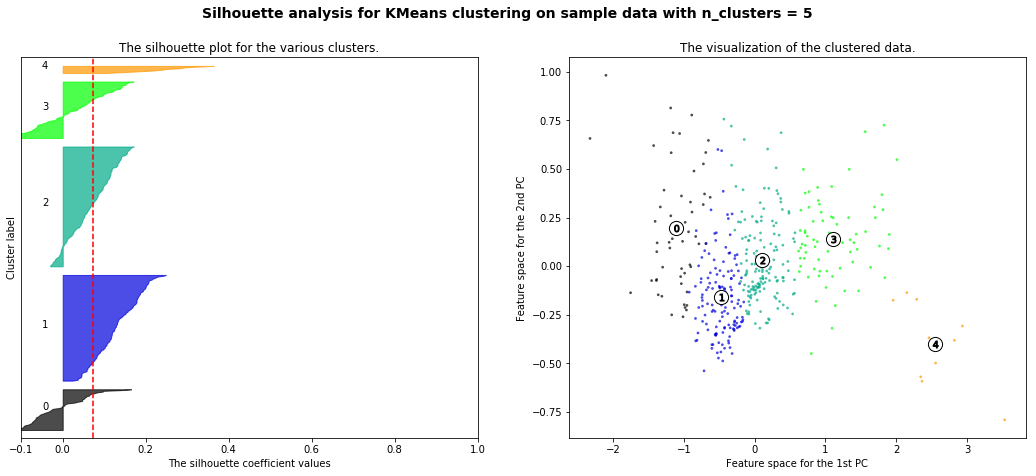

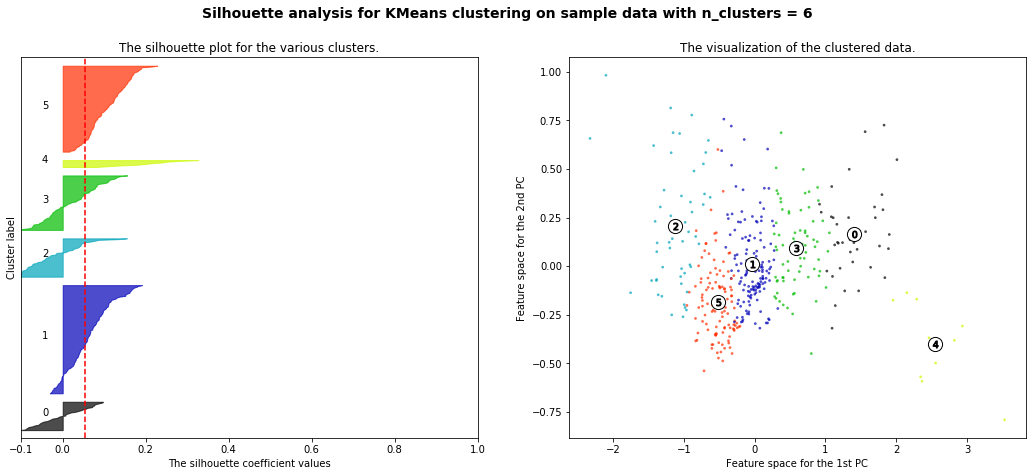

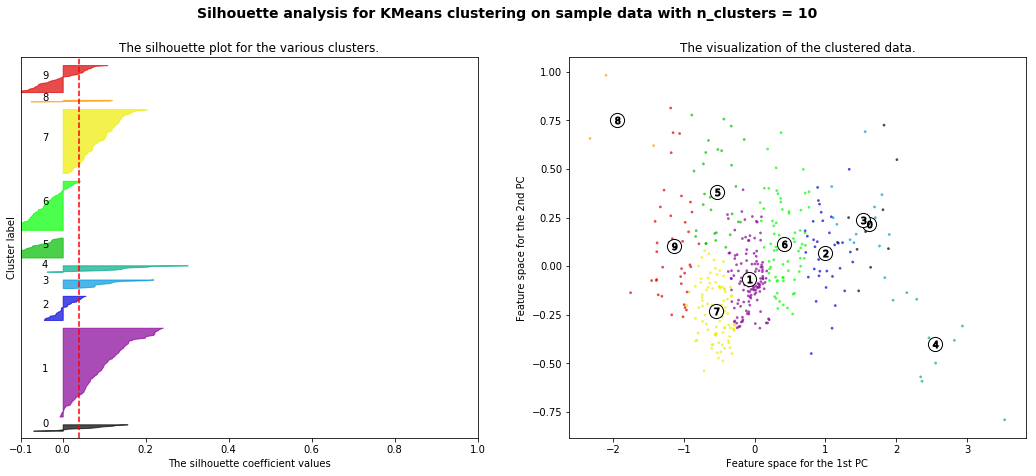

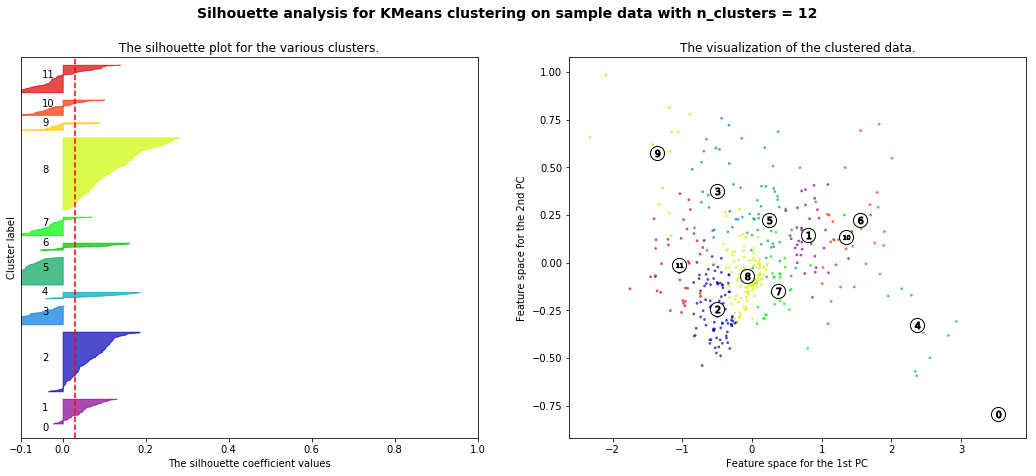

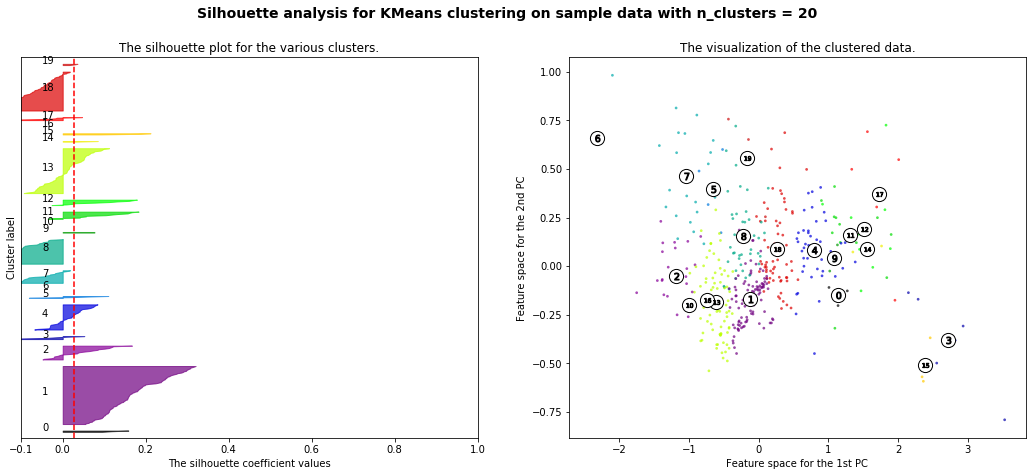

In [143]:
range_n_clusters = [2, 3, 4, 5, 6, 10, 12, 20]
y_lower = 10

X = bayes_df


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(plot_df['pc_1'], plot_df['pc_2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st PC")
    ax2.set_ylabel("Feature space for the 2nd PC")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.290787929511
For n_clusters = 3 The average silhouette_score is : 0.127777203948
For n_clusters = 4 The average silhouette_score is : 0.11873550209
For n_clusters = 5 The average silhouette_score is : 0.0990541997822
For n_clusters = 6 The average silhouette_score is : 0.0930613787273
For n_clusters = 10 The average silhouette_score is : 0.0318343851632
For n_clusters = 12 The average silhouette_score is : 0.0319493114288


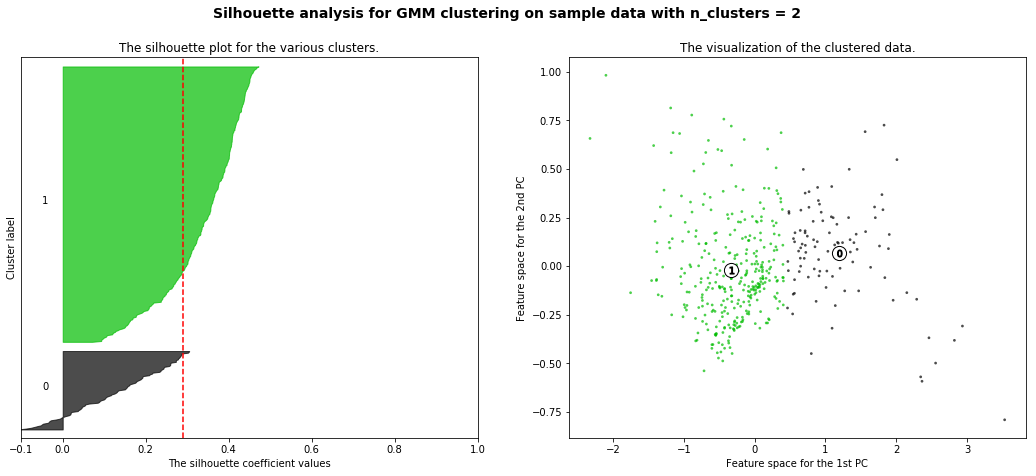

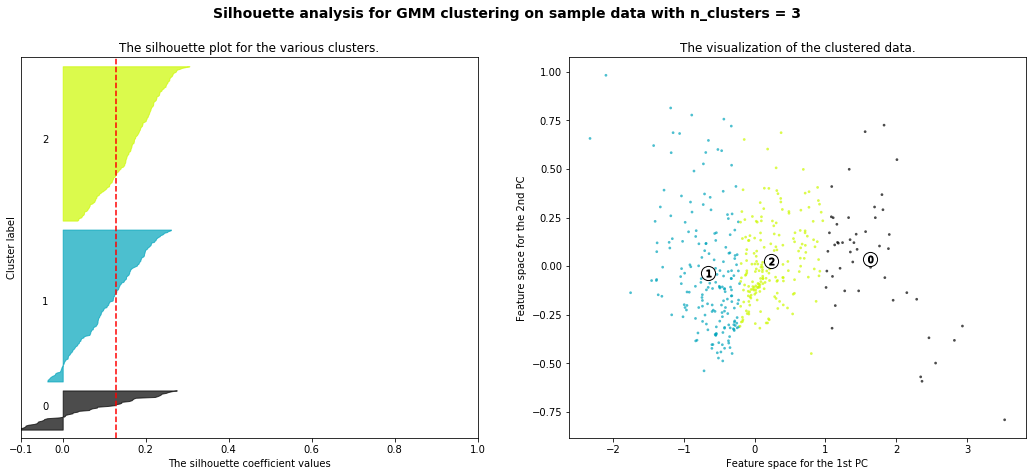

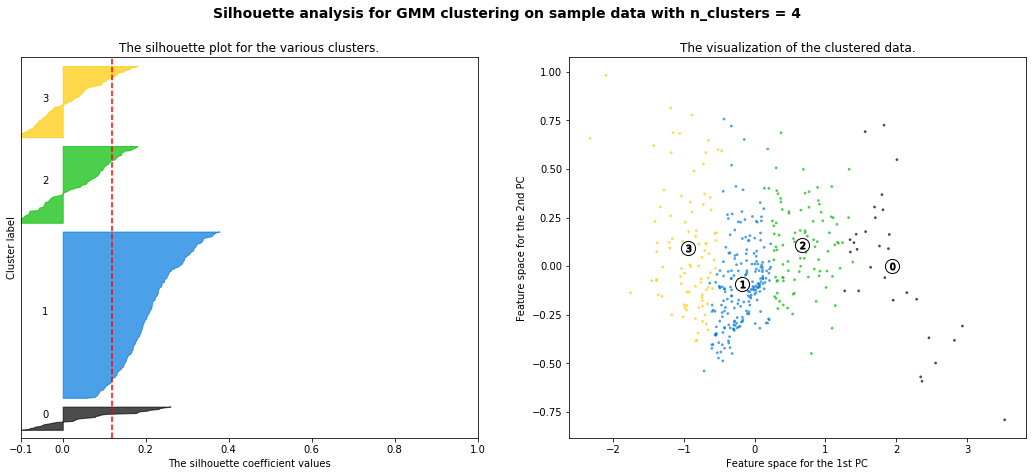

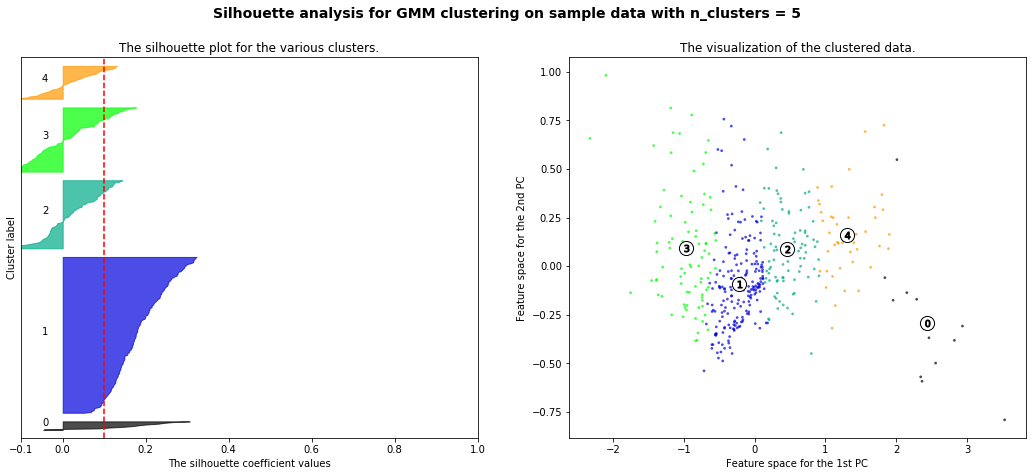

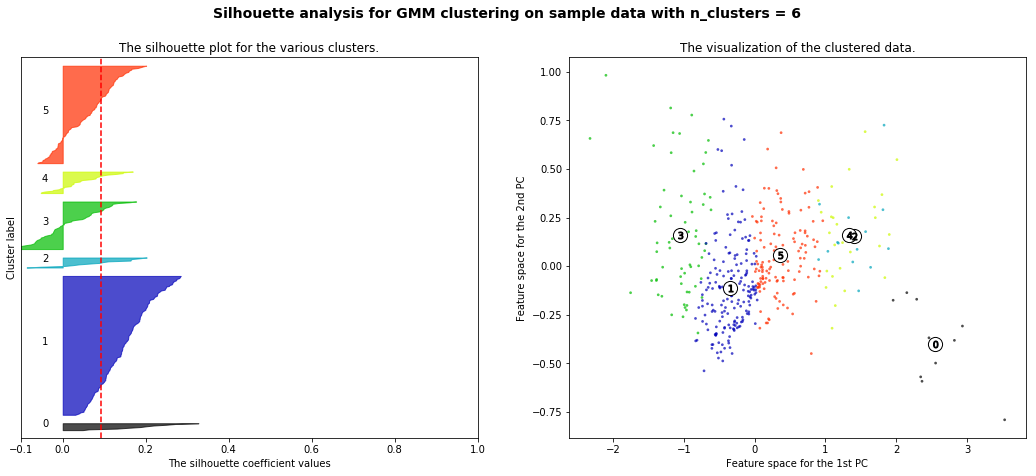

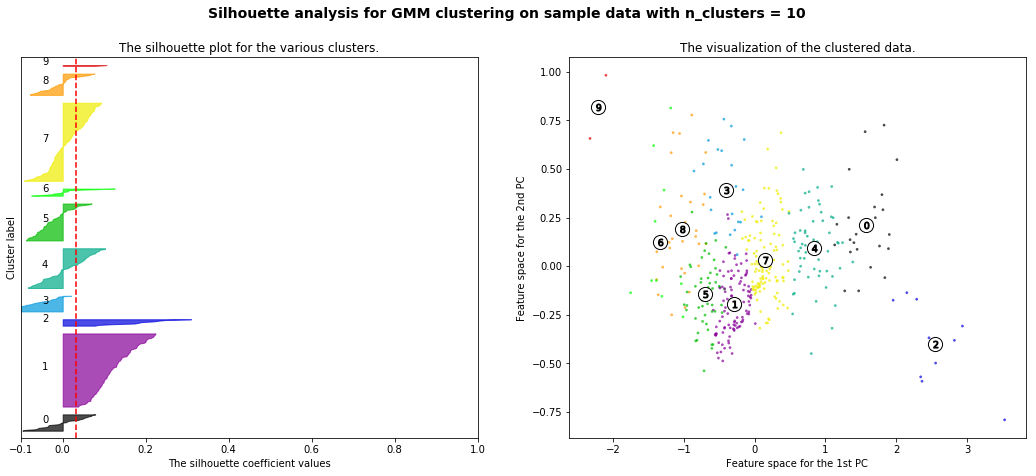

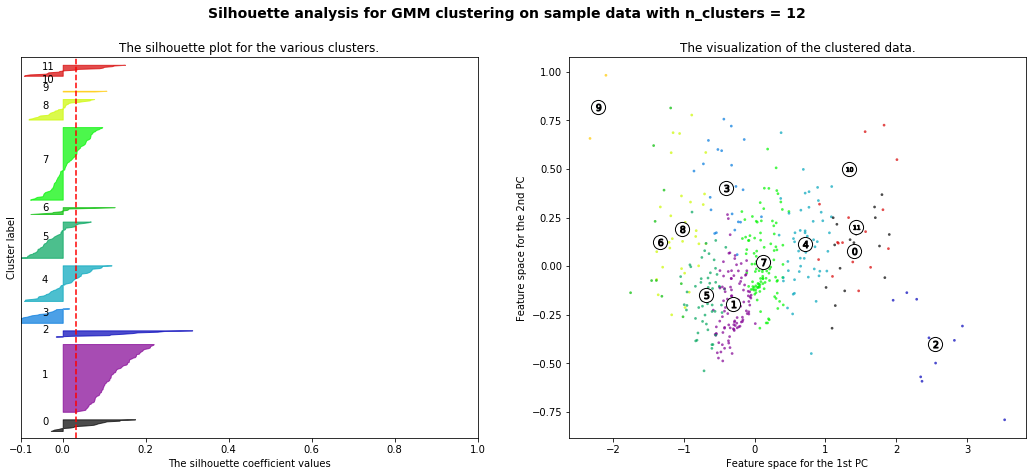

In [133]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(plot_df['pc_1'], plot_df['pc_2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_
    centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st PC")
    ax2.set_ylabel("Feature space for the 2nd PC")

    plt.suptitle(("Silhouette analysis for GMM clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [104]:
bayes_df_copy = bayes_df.copy()
bayes_df_copy['cluster'] = kmeans.labels_

In [112]:
cluster_listbayes_df_copy.groupby(['cluster']).mean()

,nat_IN,nat_HO,nat_CH,nat_EO,nat_PE,nat_LE,nat_RU,nat_LA,nat_RO,nat_KZ,...,lang_MAS,lang_TZO,lang_BHU,lang_MHL,lang_HER,lang_MNW,lang_KIG,lang_JAM,lawyer_1,lawyer_0
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.173269,0.069874,0.220869,0.385836,0.221704,0.251194,0.439810,0.181967,0.236972,0.548880,...,1.0,0.0,1.0,0.0,1.0,0.0,0.500000,0.0,0.179352,0.068809
1,0.442335,0.188487,0.653709,0.416388,0.403377,0.376929,0.677819,0.242699,0.381237,0.617871,...,1.0,0.0,1.0,0.0,1.0,0.0,0.500000,0.0,0.593627,0.203405
2,0.516487,0.286986,0.778721,0.435864,0.467132,0.370069,0.799054,0.212887,0.471523,0.680108,...,1.0,0.0,1.0,0.0,1.0,0.0,0.500000,0.0,0.768195,0.445339
3,0.352385,0.119362,0.464097,0.396986,0.316916,0.330402,0.600140,0.204841,0.325538,0.599382,...,1.0,0.0,1.0,0.0,1.0,0.0,0.500303,0.0,0.384593,0.128866
4,0.320950,0.076357,0.400388,0.396464,0.257711,0.295313,0.533759,0.188732,0.296398,0.596654,...,1.0,0.0,1.0,0.0,1.0,0.0,0.499642,0.0,0.224991,0.068803


In [ ]:
fig, ax = plt.subplots()
ax.imshow(X, interpolation='nearest')

numrows, numcols = X.shape


def format_coord(x, y):
    col = int(x + 0.5)
    row = int(y + 0.5)
    if col >= 0 and col < numcols and row >= 0 and row < numrows:
        z = X[row, col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f' % (x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f' % (x, y)

In [141]:
# write ij_code and clusters
print_df = pd.DataFrame({'judge':judge_list})

cluster_counts = [4, 5, 6, 8, 10, 15, 20]
cluster_types = ['kmeans', 'GMM', 'hierarchical']
for i in cluster_counts:
    for j in cluster_types:
        if j == 'kmeans':
            clusterer = KMeans(n_clusters=i, random_state=10)
            cluster_labels = clusterer.fit_predict(X)
        elif j == 'GMM':
            clusterer = GaussianMixture(n_components=i, random_state=10)
            clusterer.fit(X)
            cluster_labels = clusterer.predict(X)
        elif j == 'hierarchical':
            clusterer = KMeans(n_clusters=i)
            cluster_labels = clusterer.fit_predict(X)
        print_df[j + '-' + str(i)] = cluster_labels
print_df.to_csv('clustering_labels.csv')
                       

In [142]:
print_df

,judge,kmeans-4,GMM-4,hierarchical-4,kmeans-5,GMM-5,hierarchical-5,kmeans-6,GMM-6,hierarchical-6,...,hierarchical-8,kmeans-10,GMM-10,hierarchical-10,kmeans-15,GMM-15,hierarchical-15,kmeans-20,GMM-20,hierarchical-20
0,TAB,0,0,1,4,0,4,4,0,4,...,5,4,2,0,4,2,2,3,16,18
1,AJR,2,2,2,3,4,1,0,4,3,...,0,2,4,4,5,0,10,4,13,6
2,CJS,1,1,0,1,1,3,5,1,0,...,6,7,1,1,7,1,11,1,1,15
3,HO,3,3,3,1,3,3,5,1,0,...,1,5,5,6,3,1,8,13,1,5
4,IW,0,0,2,3,4,1,0,2,1,...,0,0,0,7,5,13,14,12,13,6
5,CMR,1,1,0,1,1,3,5,1,0,...,1,7,5,1,7,1,4,8,1,8
6,DLM,0,0,1,3,4,1,0,2,1,...,3,0,0,7,14,13,14,12,17,12
7,KWO,3,3,3,0,3,2,2,3,5,...,7,9,8,6,3,8,8,7,5,5
8,PAW,2,2,2,3,4,1,0,2,1,...,3,0,4,7,5,13,14,12,13,12
9,EAH,3,3,3,0,3,2,2,3,5,...,7,9,8,3,8,8,7,7,19,13
